<a href="https://colab.research.google.com/github/wenyi22/python-deep-learning/blob/main/%E9%80%A2%E7%94%B2%E5%A4%A7%E5%AD%B8%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E7%AC%AC%E5%9B%9B%E5%A0%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#台積電股票分析(線姓迴歸)

In [ ]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
# 使用程式來mount 雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/DL_FCU/TSMC'
os.chdir(path) #切換至該目錄
file_list = os.listdir()  #列出目前資料夾中的所有檔案
file_list.sort()  #排序
file_list

['STOCK_DAY_2330_202207.csv',
 'STOCK_DAY_2330_202208.csv',
 'STOCK_DAY_2330_202209.csv',
 'STOCK_DAY_2330_202210.csv',
 'STOCK_DAY_2330_202211.csv',
 'STOCK_DAY_2330_202212.csv',
 'STOCK_DAY_2330_202301.csv',
 'STOCK_DAY_2330_202302.csv',
 'STOCK_DAY_2330_202303.csv',
 'STOCK_DAY_2330_202304.csv',
 'STOCK_DAY_2330_202305.csv',
 'STOCK_DAY_2330_202306.csv',
 'STOCK_DAY_2330_202307.csv']

In [ ]:
df = open(path+"/"+file_list[0])
data = df.readline() #讀取第一行
print(data)
data = pd.read_csv(df)
data = data.drop(['日期'],axis=1)
data = data.dropna() #刪除缺失值
data

﻿111年07月 2330 台積電           各日成交資訊,,,,,,,,



,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,"72,597,018","33,459,624,760",471.5,474.0,452.5,453.5,-22.5,"172,267"
1,"61,206,245","27,225,872,277",443.0,451.5,440.0,440.0,-13.5,"96,760"
2,"55,469,884","24,538,415,224",449.5,451.5,433.0,446.0,6.0,"70,715"
3,"42,156,925","18,556,660,847",442.0,447.5,435.0,435.5,-10.5,"59,018"
4,"50,984,110","22,992,311,966",442.0,459.0,438.5,457.5,22.0,"56,227"
5,"39,134,398","18,251,251,558",470.0,470.5,461.5,467.0,9.5,"46,039"
6,"22,930,675","10,673,806,551",468.0,470.5,461.0,462.0,-5.0,"25,631"
7,"24,155,935","10,932,798,847",458.0,458.0,449.5,449.5,-12.5,"34,431"
8,"48,134,139","22,639,696,871",470.5,473.0,466.0,470.5,21.0,"48,964"
9,"34,014,188","16,045,789,881",466.0,477.5,463.0,475.0,4.5,"36,454"


In [ ]:
allData = data #先交付第一個資料
for i in range(1,13):
  df = open(path+"/"+file_list[i])
  data = df.readline() #讀取一行，以方便 pd 呈現
  data = pd.read_csv(df)
  data = data.drop(['日期'],axis=1)
  # data = data.drop(['日期', 'Unnamed: 9'], axis=1)
  data = data.dropna() #刪除缺失值
  #資料合併
  allData = pd.concat([allData,data])

allData

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,"72,597,018","33,459,624,760",471.5,474.0,452.5,453.5,-22.5,"172,267"
1,"61,206,245","27,225,872,277",443.0,451.5,440.0,440.0,-13.5,"96,760"
2,"55,469,884","24,538,415,224",449.5,451.5,433.0,446.0,6.0,"70,715"
3,"42,156,925","18,556,660,847",442.0,447.5,435.0,435.5,-10.5,"59,018"
4,"50,984,110","22,992,311,966",442.0,459.0,438.5,457.5,22.0,"56,227"
...,...,...,...,...,...,...,...,...
10,"14,311,753","8,428,551,949",588.0,591.0,587.0,591.0,0.0,"18,226"
11,"22,022,410","12,866,196,578",587.0,588.0,580.0,581.0,-10.0,"31,079"
12,"24,909,638","14,517,904,258",584.0,587.0,579.0,581.0,0.0,"20,069"
13,"15,676,734","9,102,325,307",580.0,584.0,578.0,579.0,-2.0,"19,382"


#圖像視覺化

np.linspzce =>等差數列

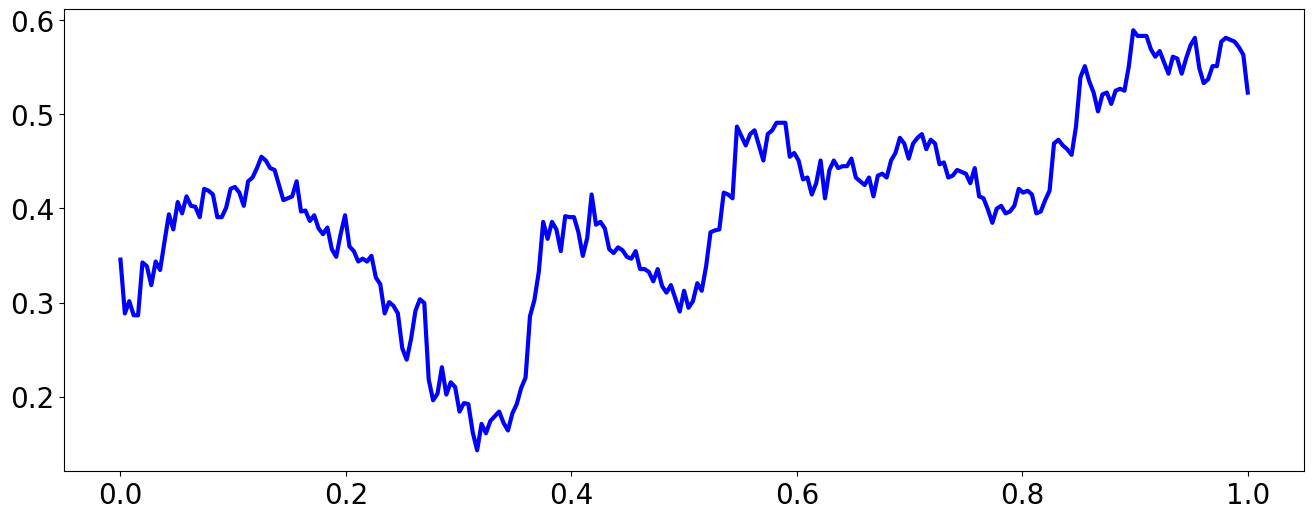

In [ ]:
x = np.linspace(0,1,len(allData))
y = np.array(allData.iloc[:,2]/np.mean(allData.iloc[:,2])-0.6)
plt.rcParams['figure.figsize'] = (16,6) #英吋 圖表的大小
plt.plot(x,y,'b-',linewidth=3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

預測
抓取最近的一個CSV進來

In [ ]:
df = open(path+"/"+file_list[-1]) #(資料夾/資料列中的最後一個)
data = df.readline()
data = pd.read_csv(df)
#data
data = data.drop(['日期'],axis=1)
data = data.dropna() #刪除缺失值

test_x = np.linspace(len(x)+1,len(x)+len(data),len(data))*(x[1]-x[0]) #等差數列(開始，結束，生成元素數量)*(x中第二個元素減掉x中第一個元素=差值)
test_y = np.array(data.iloc[:,2]/np.mean(allData.iloc[:,2])-0.6)

In [ ]:
print(len(x))
print(len(data))

#len(x)開始~len(x)+15,15

t_x = np.linspace(len(x)+1,len(x)+len(data),len(data))
print(t_x)

print(x[1])
print(x[0])
print(x[1]-x[0])

print(test_x)

251
15
[252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265.
 266.]
0.004
0.0
0.004
[1.008 1.012 1.016 1.02  1.024 1.028 1.032 1.036 1.04  1.044 1.048 1.052
 1.056 1.06  1.064]


#套入演算法

線性回歸方程式

h(x) = w0 + w1x

線性代數:權重 w  Ax  =  B

將兩邊同乘

A^TAx = A^TB

==> x = (A^TA)^-1A^TB

In [ ]:
#設定權重函式
def refresh(X,y,w,a):
  dJ = (X.dot(w.T)-y).dot(X)/len(y)   #權重公式
  newW = w - a *dJ
  return newW
#多項式回歸
def Polynomial_regression(s,x,y,test_x,test_y):
  # n : n次特徵轉換
  # a : 學習速度參數
  # T : 更新次數
  # w : 權重
  # X :資料矩陣
  n = s + 1
  a = 1
  T = 1000
  X = np.zeros((len(x), n))
  #產稱資料矩陣
  for i in range(n):
    X[:, i] = x ** i

  #初始化權重
  w = (np.linalg.inv((X.T).dot(X)).dot(X.T)).dot(y)


  #紀錄 w 產生的預估值
  plot_yy = X.dot(w.T)
  for t in range(T):
    w = refresh(X,y,w,a)
  plot_y = X.dot(w.T)

  #計算相差多少
  error = 0
  for k in range(len(y)):
    error += abs(plot_y[k]-y[k])
  error = error / len(y)
  print('訓練錯誤有:',error)

  #產生測試集的資料矩陣
  test_X = np.zeros((len(test_x), n))
  #產稱資料矩陣
  for i in range(n):
    test_X[:,i] = test_x ** i

  pred_error = 0
  pred_y = test_X.dot(w.T)

  #計算測試集的錯誤率
  for k in range(len(pred_y)):
    pred_error += abs(pred_y[k]-test_y[k])
  pred_error = pred_error / len(test_y)
  print('測試錯誤有:',pred_error)

  #繪圖
  plt.rcParams['figure.figsize'] = (10,10)
  plt.plot(x,plot_y,'g-',linewidth=6,label='fitting')
  plt.plot(test_x,pred_y,'g-',linewidth=6)
  plt.plot(x,y,'b-',linewidth=3,label='training data')
  plt.plot(test_x,test_y,'r-',linewidth=3,label='testing data')
  plt.title('TSMC:'+str(n-1)+" feature transform",fontsize=20)
  plt.legend(loc=6,fontsize=20)
  plt.grid()
  plt.show()
  return error,pred_error

訓練錯誤有: 0.070961620429277
測試錯誤有: 0.060557473660801074


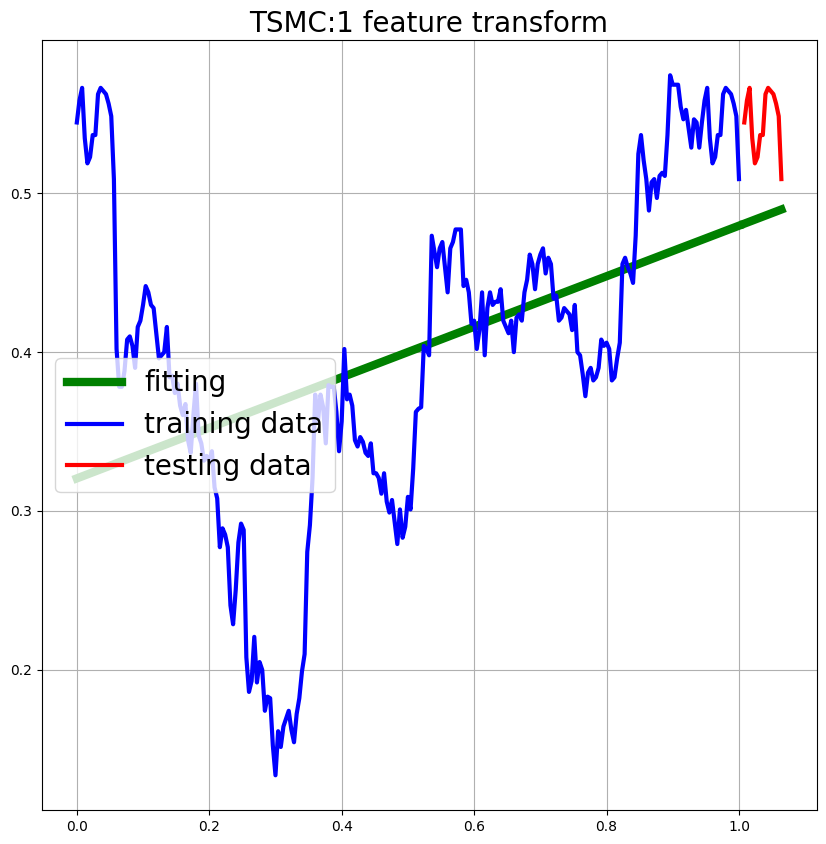

訓練錯誤有: 0.05539554434554211
測試錯誤有: 0.10864888707042125


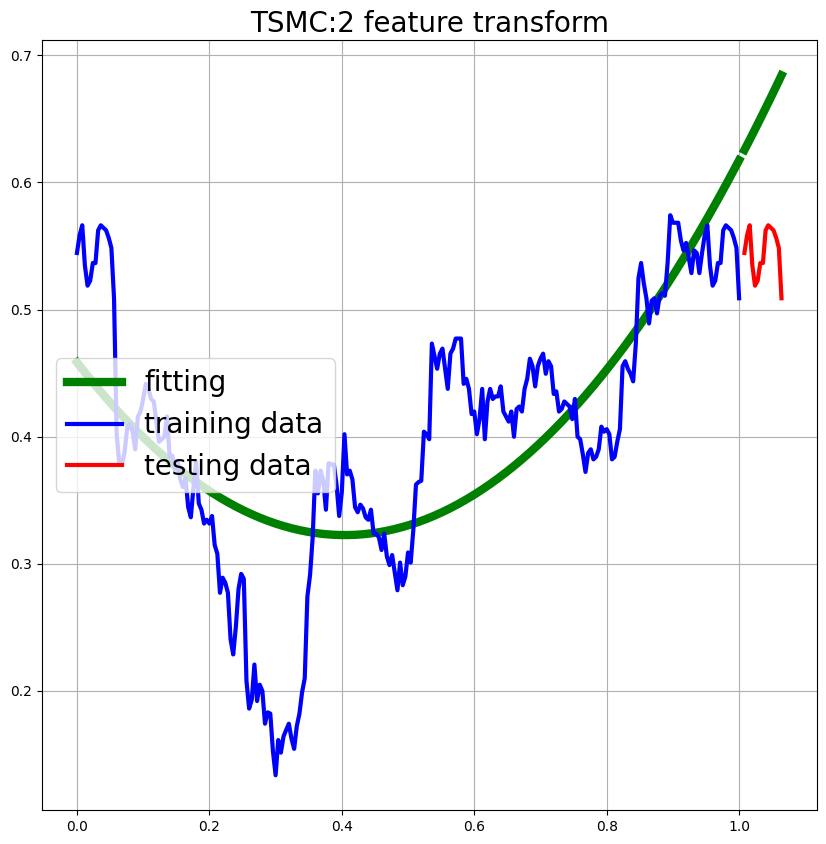

訓練錯誤有: 0.046050549174047384
測試錯誤有: 0.051010096293795874


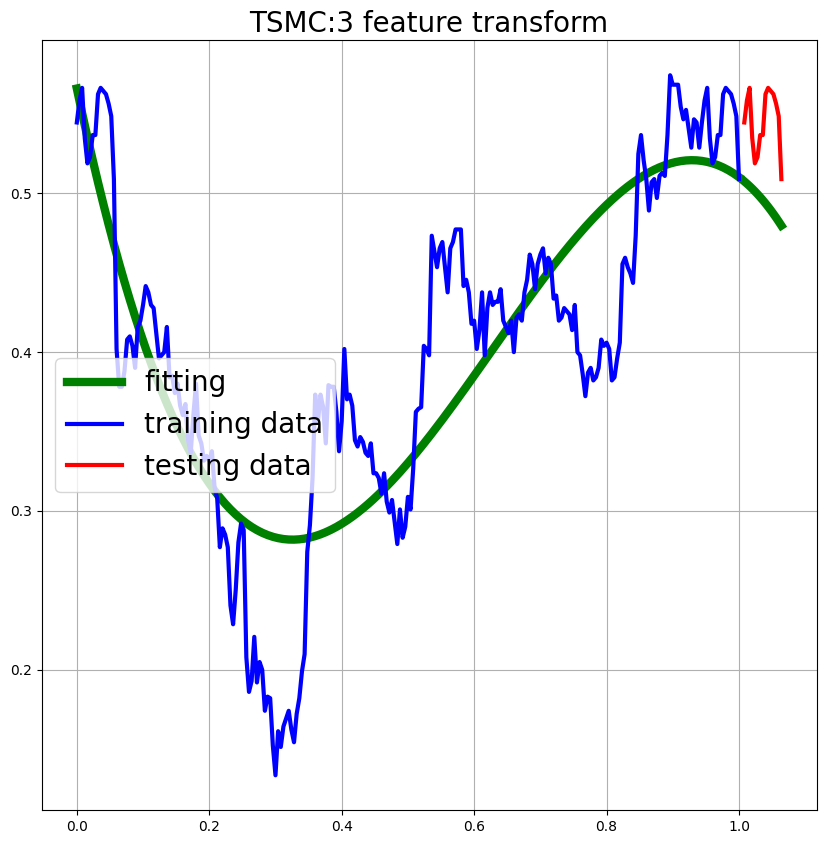

訓練錯誤有: 0.04345968221737343
測試錯誤有: 0.08297211221652609


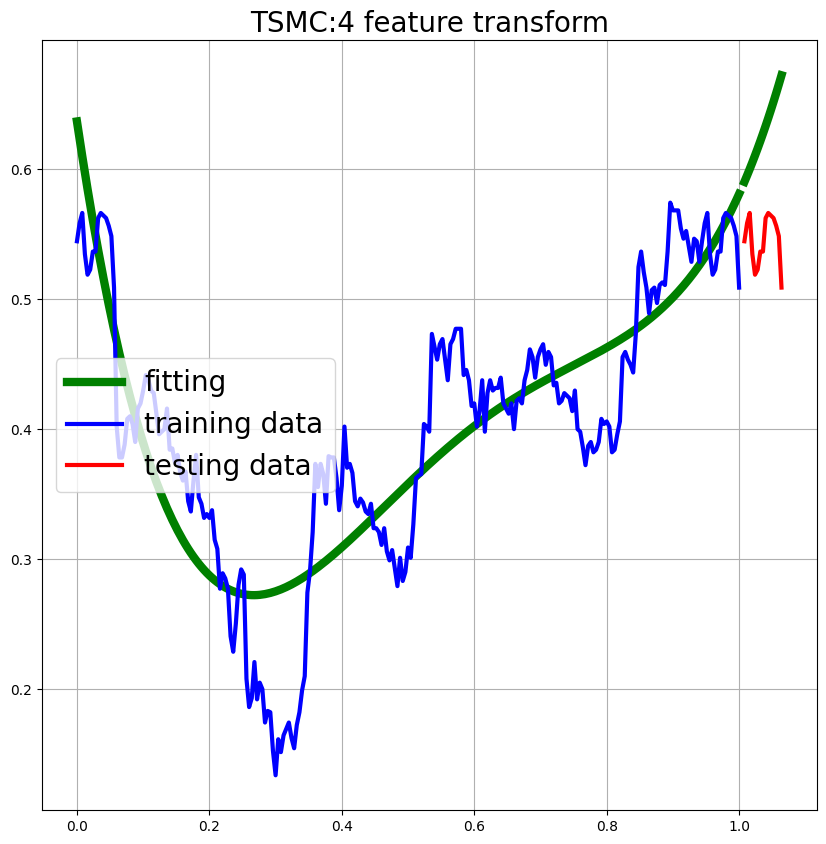

訓練錯誤有: 0.0424686185097862
測試錯誤有: 0.1865578590299317


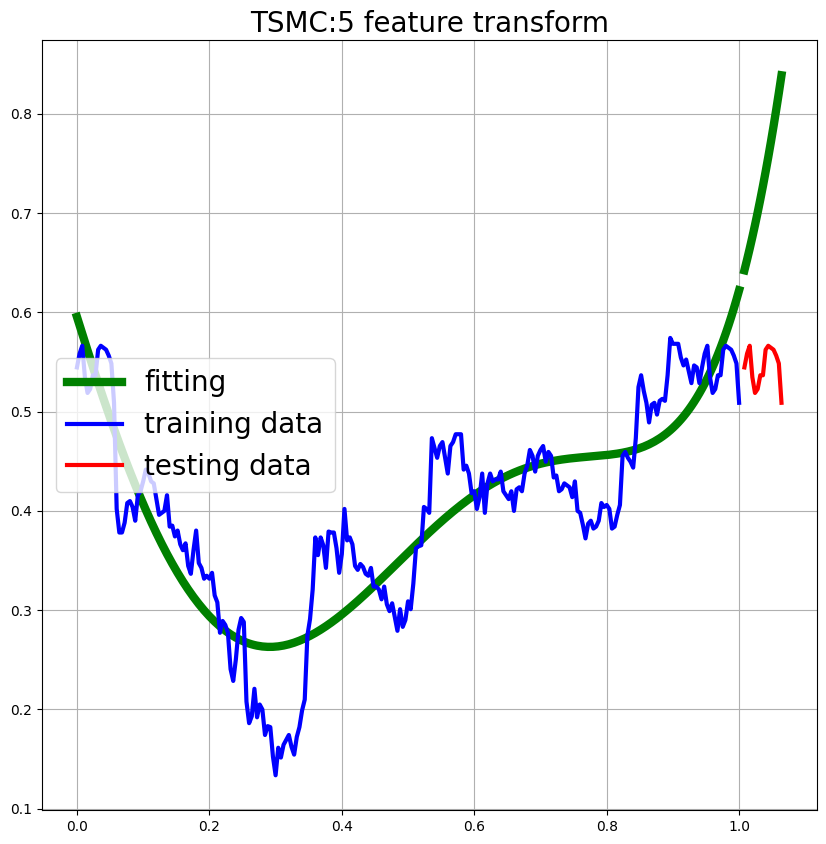

訓練錯誤有: 0.03599651168404082
測試錯誤有: 0.08539887335262293


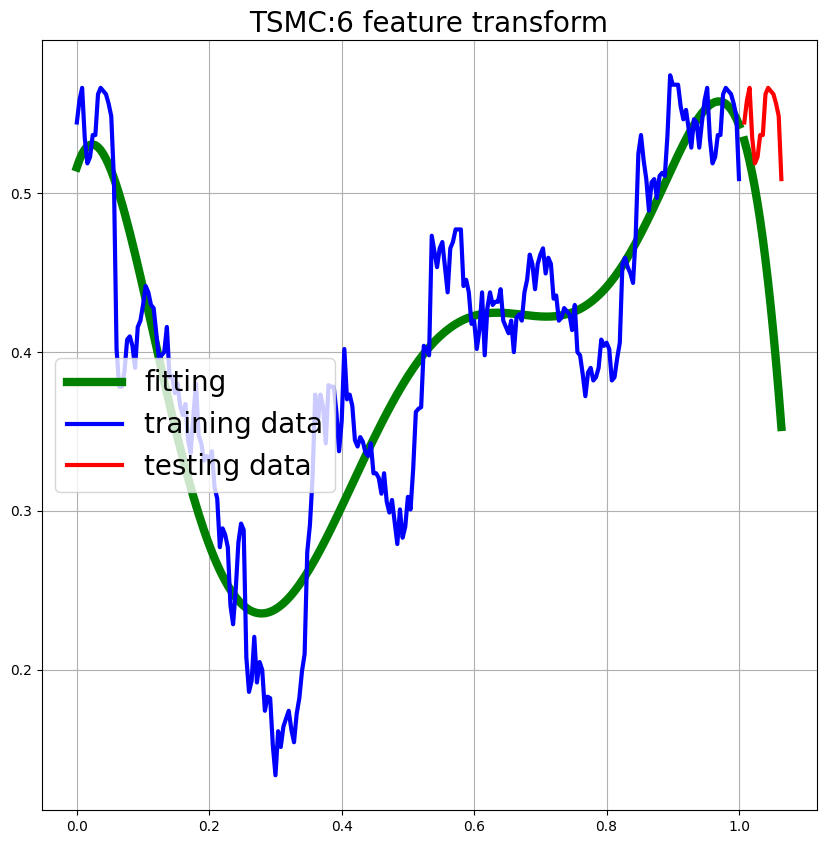

訓練錯誤有: 0.03488866772956625
測試錯誤有: 0.27529627682611396


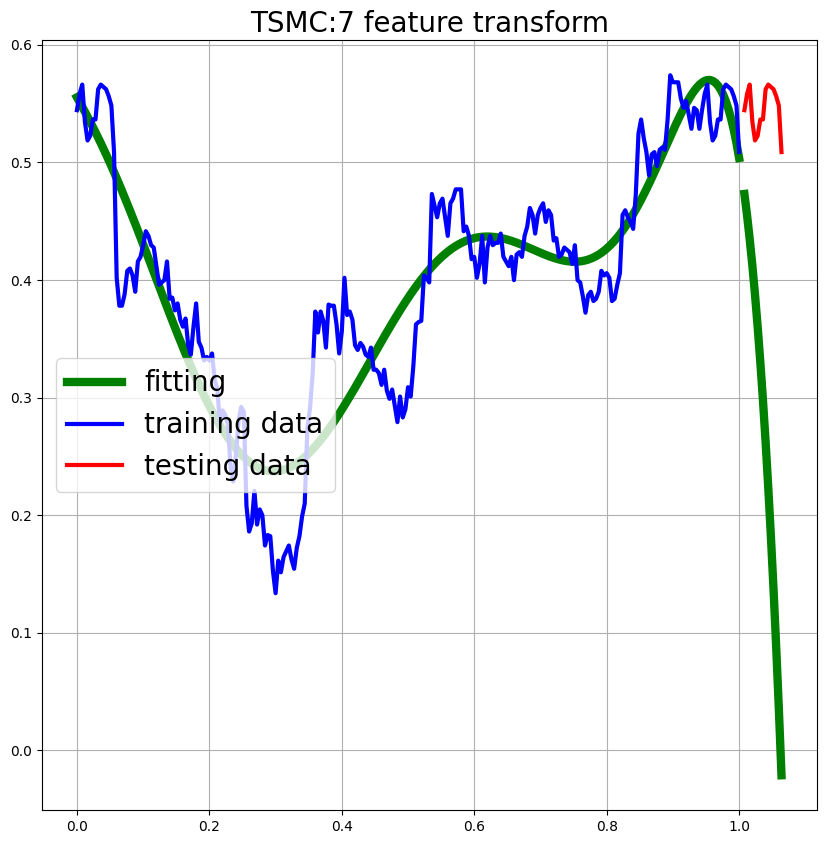

訓練錯誤有: 0.03419345301449234
測試錯誤有: 0.14359001004683952


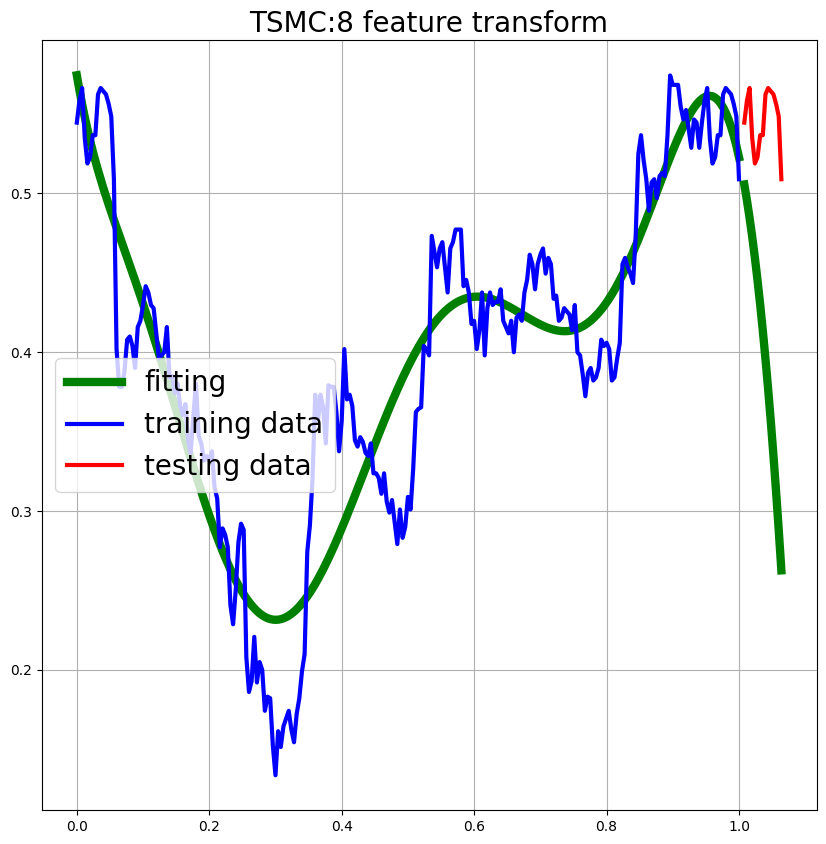

訓練錯誤有: 0.034136486701630206
測試錯誤有: 0.24801501053967623


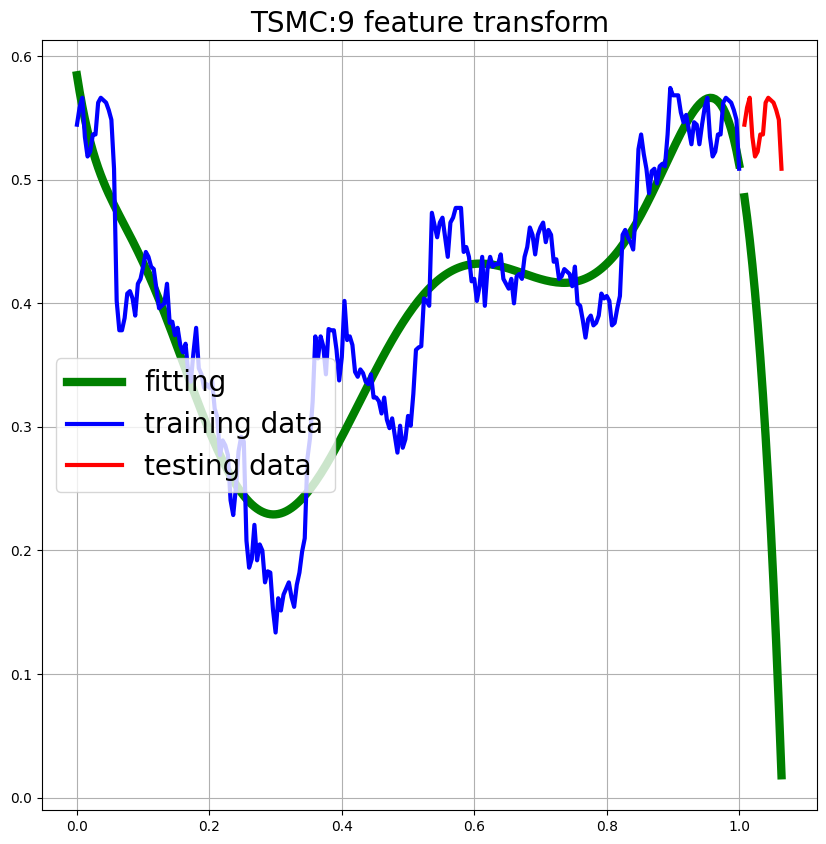

訓練錯誤有: 0.0338163993318471
測試錯誤有: 0.13655211526891106


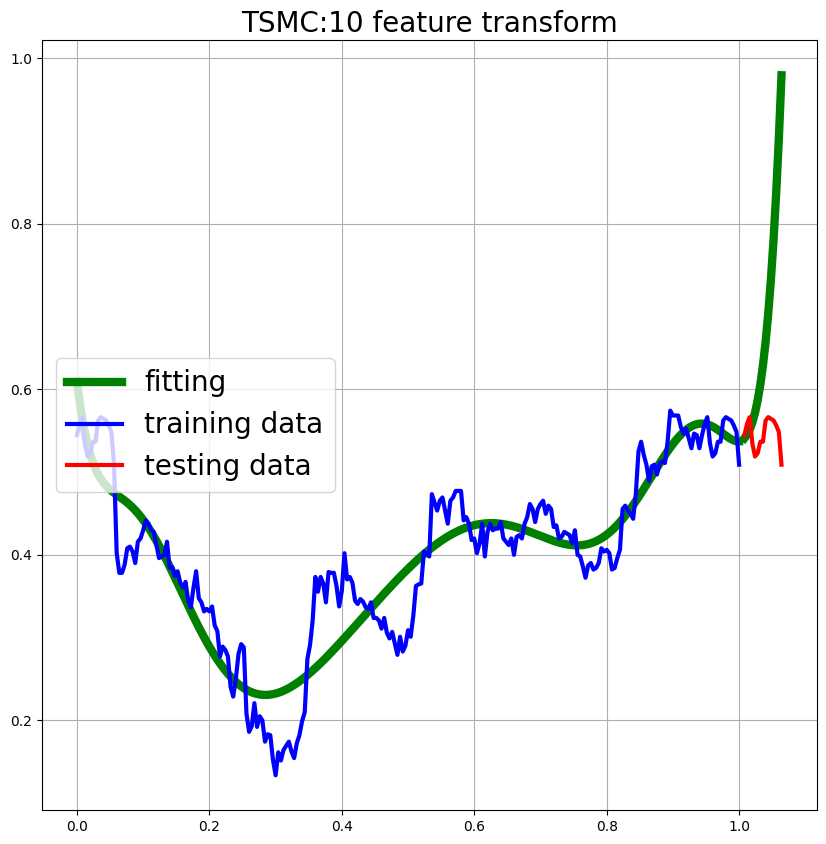

訓練錯誤有: 0.030720383324629813
測試錯誤有: 1.4429114804360372


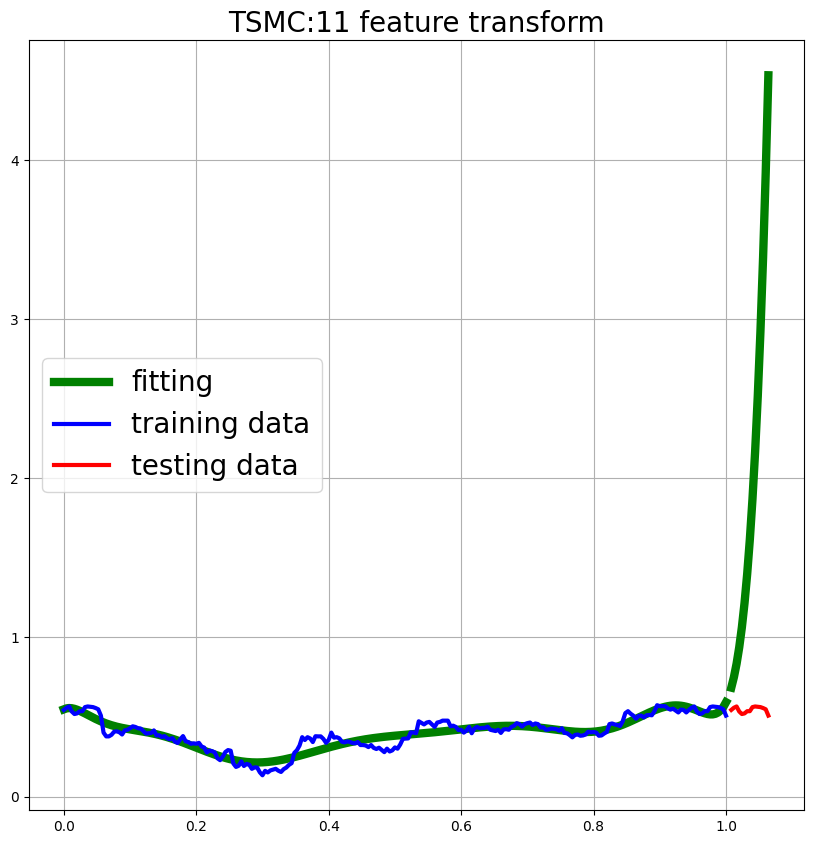

訓練錯誤有: 0.03039859379093989
測試錯誤有: 1.1189353584451245


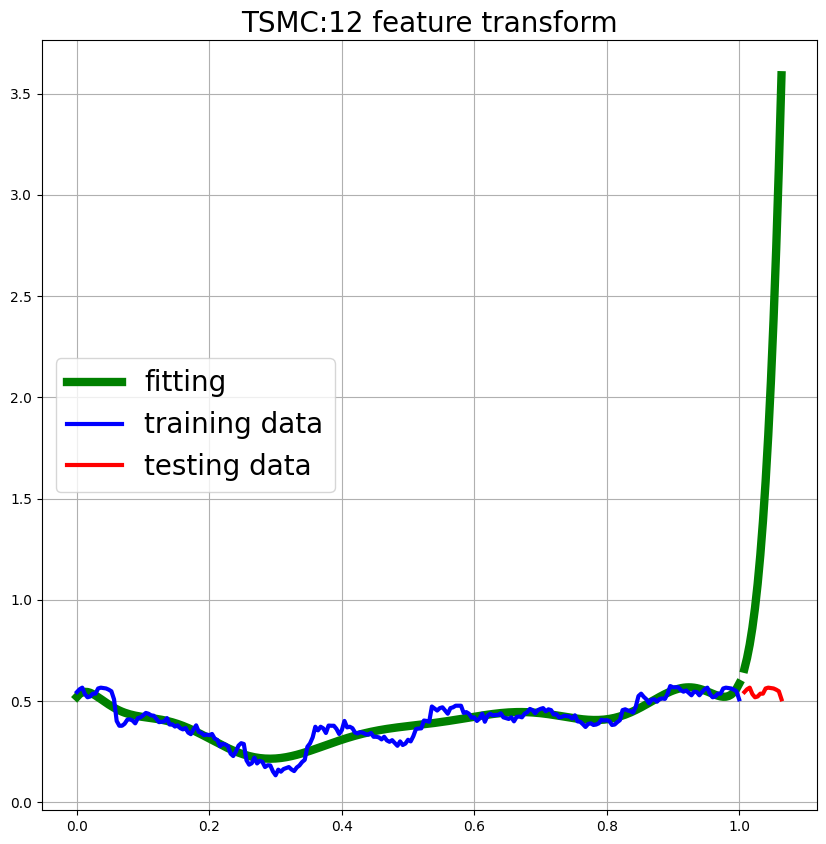

訓練錯誤有: 0.054394244672366185
測試錯誤有: 7.95934554704099


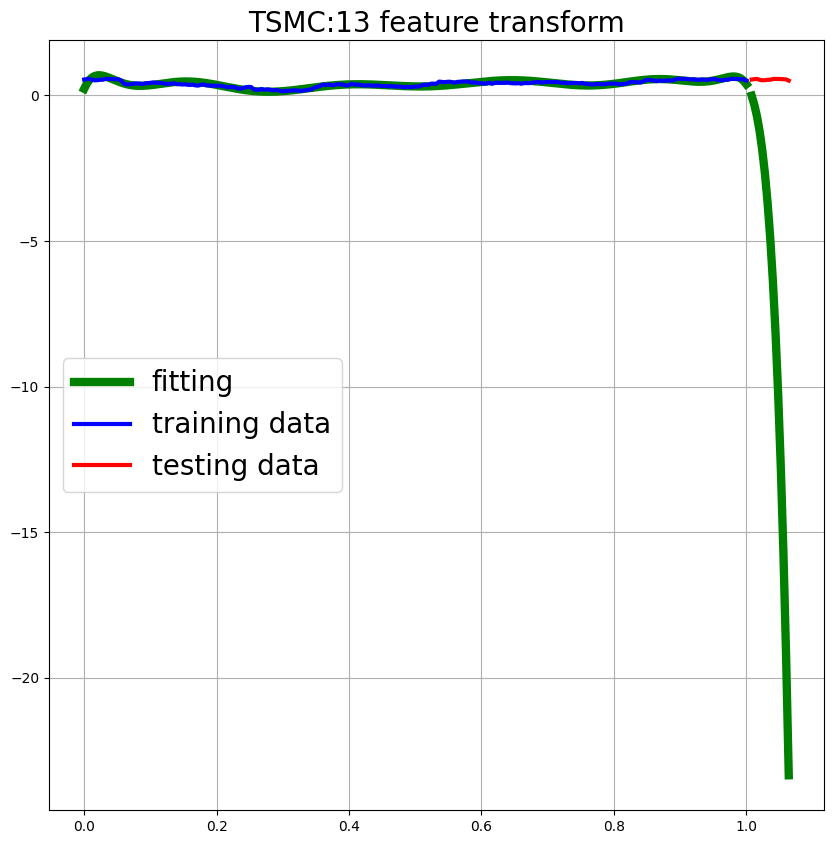

訓練錯誤有: 0.03137439683152271
測試錯誤有: 1.7140652550782411


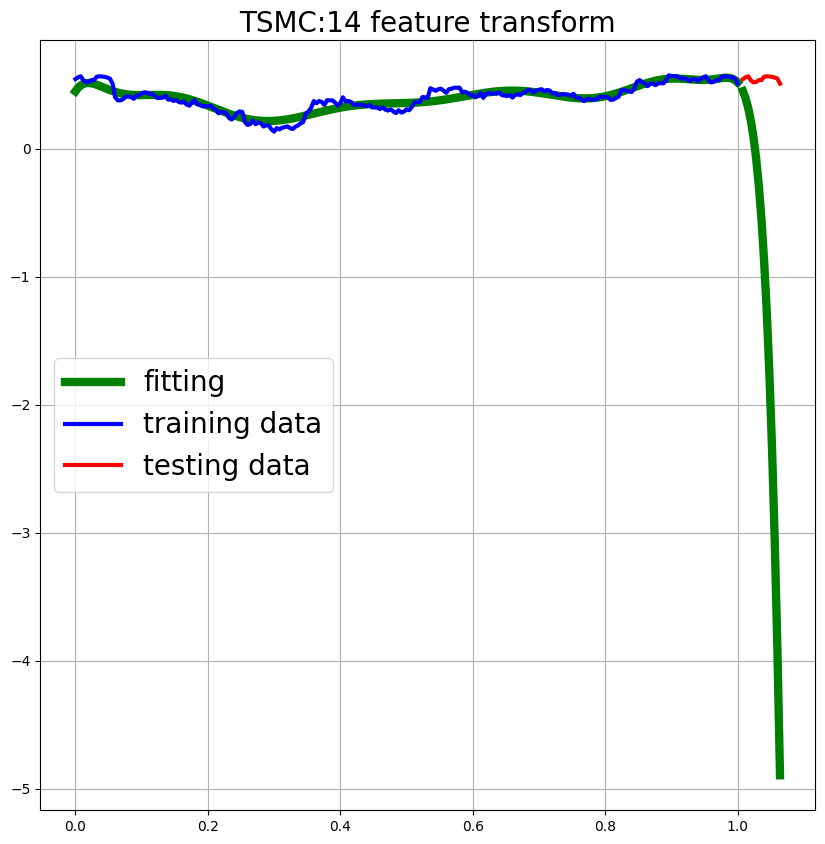

訓練錯誤有: 0.0614435332426503
測試錯誤有: 0.9820419146738845


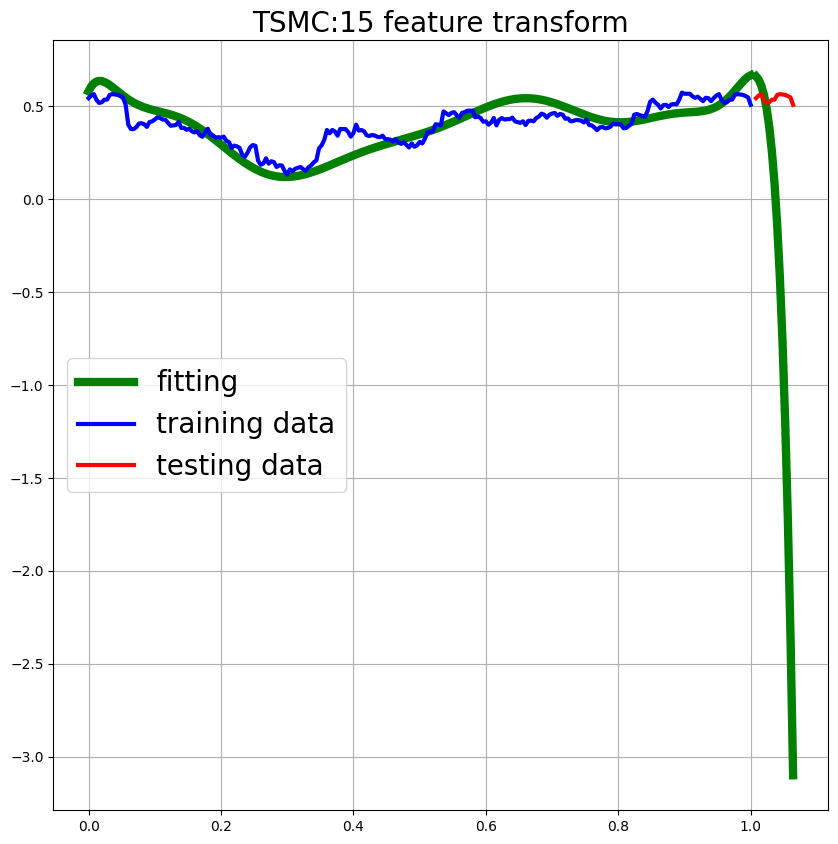

訓練錯誤有: 0.0508330481915005
測試錯誤有: 1.4146108022973156


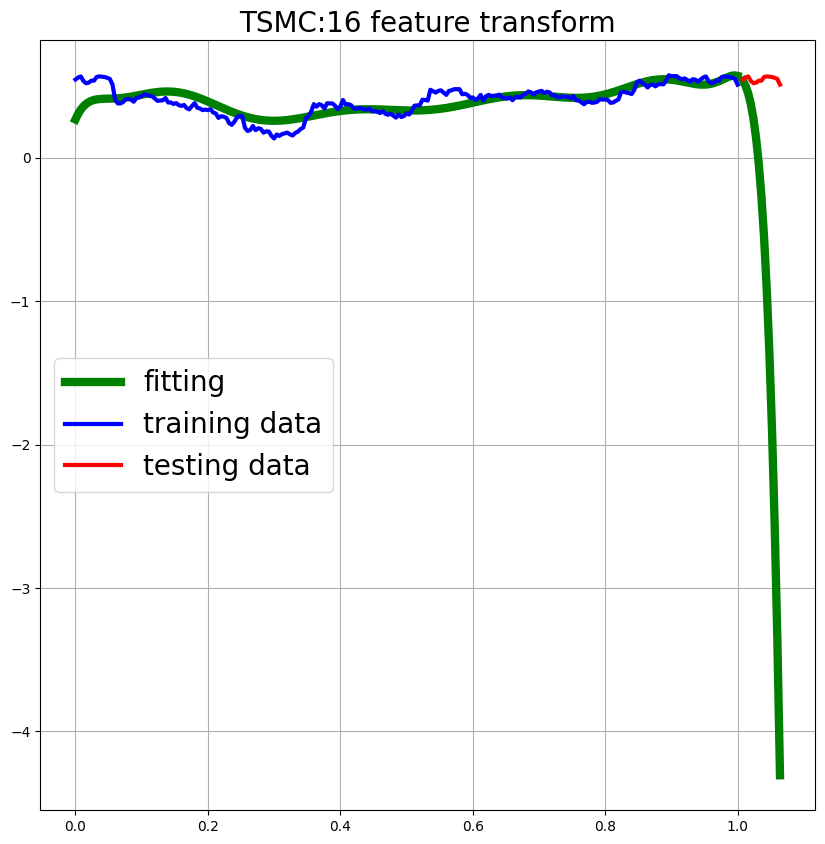

訓練錯誤有: 0.03316849361515596
測試錯誤有: 0.17125448313597383


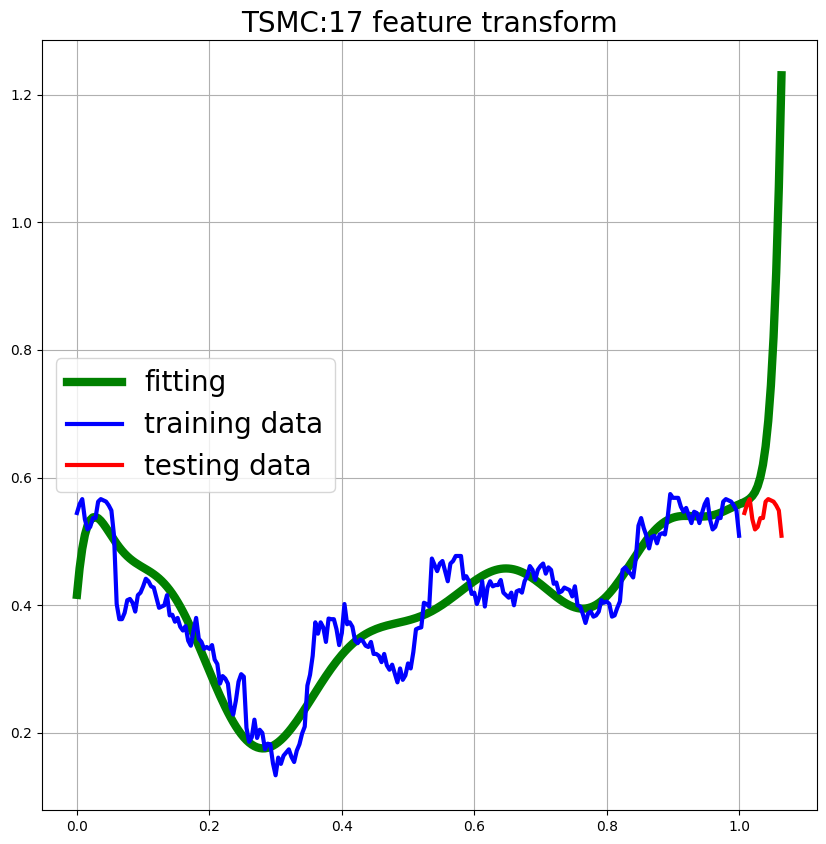

訓練錯誤有: 0.07005330531561736
測試錯誤有: 1.8858463226129014


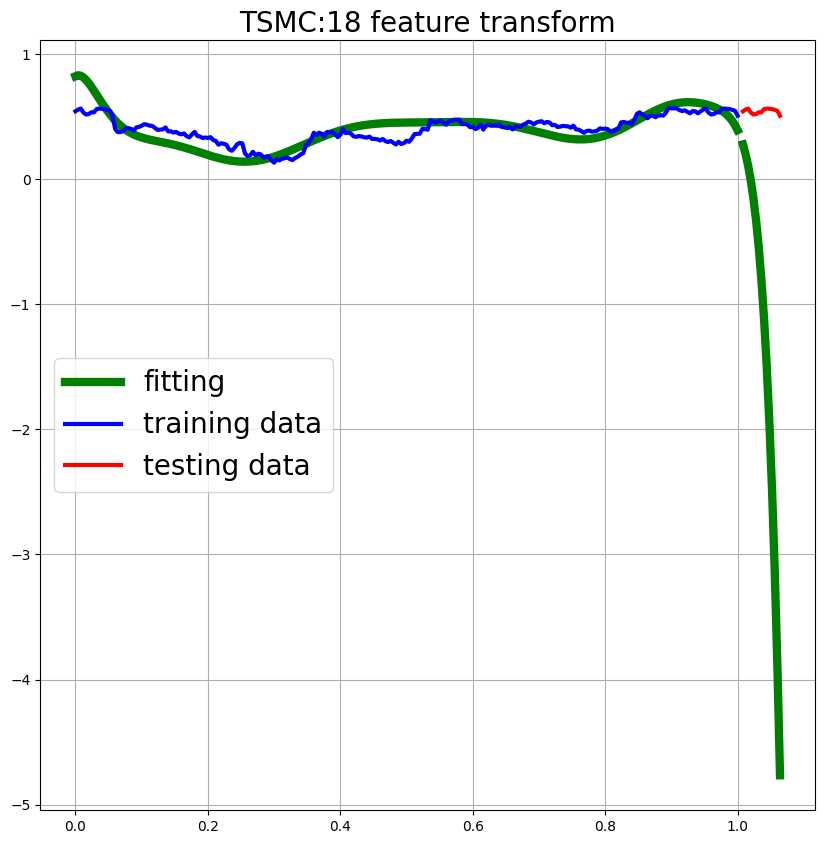

訓練錯誤有: 0.031251551241290206
測試錯誤有: 1.7828314271552046


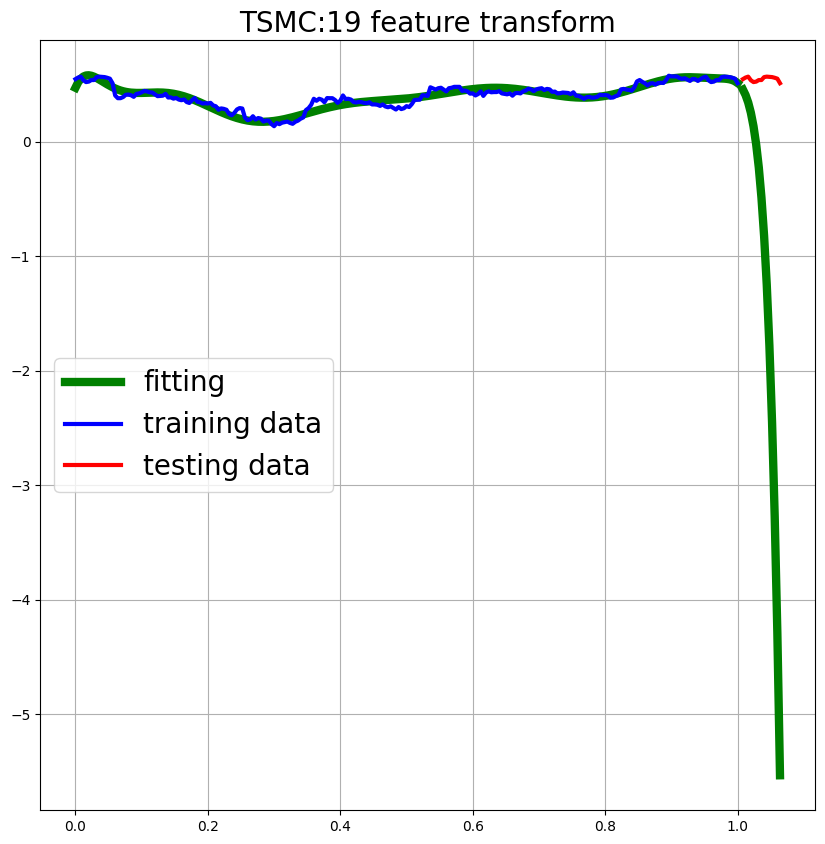

訓練錯誤有: 0.1416340534705212
測試錯誤有: 6.954789127968359


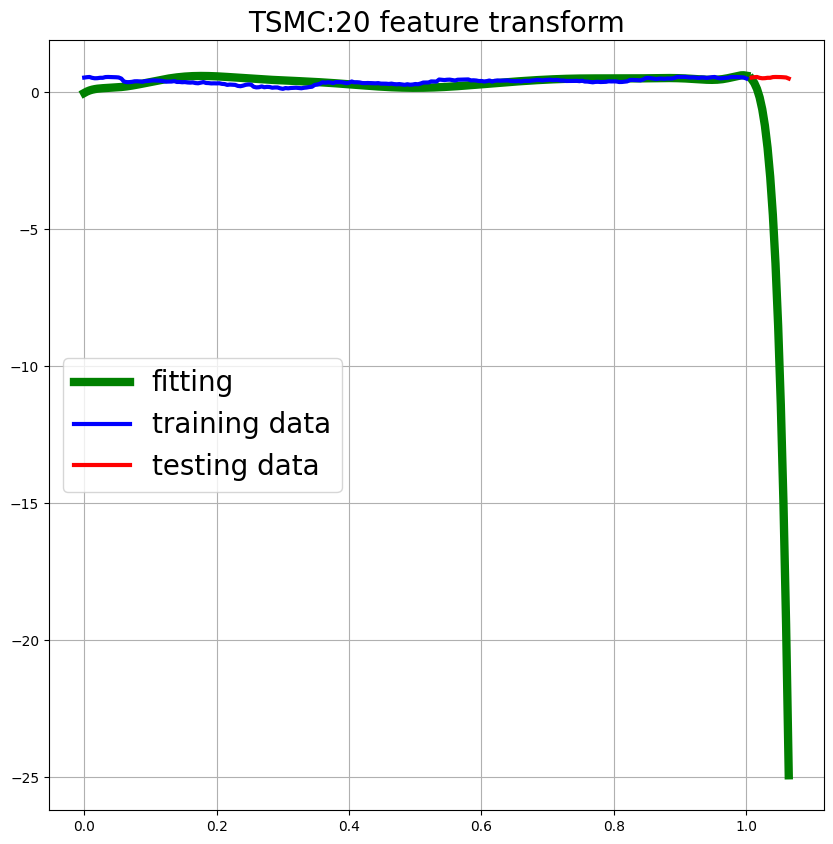

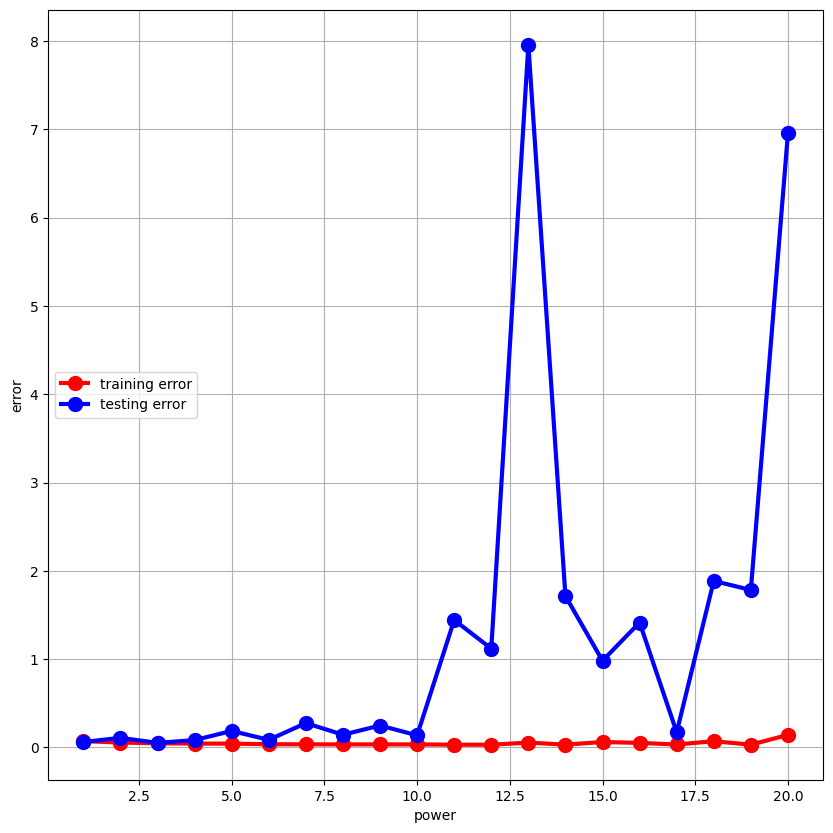

In [ ]:
errorx = np.zeros(20)
errory_train = np.zeros(20)
errory_test = np.zeros(20)
for i in range(1,21):
  errorx[i-1] = i
  errory_train[i-1],errory_test[i-1] = Polynomial_regression(i,x,y,test_x,test_y)

plt.rcParams['figure.figsize'] = (10,10)
plt.plot(errorx,errory_train,'r-o',linewidth=3,markersize=10,label='training error')
plt.plot(errorx,errory_test,'b-o',linewidth=3,markersize=10,label='testing error')
plt.xlabel('power')
plt.ylabel('error')
plt.legend(loc=6)
plt.grid()
plt.show()

In [ ]:
import numpy as np

array = [
    [1,2,3,4,5],
      [6,7,8,9,10],
      [11,12,13,14,15]]

array = np.array(array)

array

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [ ]:
print(array.T) #轉置矩陣

[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]


In [ ]:
print(array.transpose())

[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]


In [ ]:
#矩陣相乘(內積)
x = np.arange(1,5)
y = np.arange(5,9)
print(x)
print(y)
x.shape=2,2
y.shape=2,2
print()
print(x)
print(y)

[1 2 3 4]
[5 6 7 8]

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


In [ ]:
print(x.dot(y))
print()
print(np.dot(x,y))

[[19 22]
 [43 50]]

[[19 22]
 [43 50]]


In [ ]:
#說明函式內的運算
print(np.zeros(20))
n = 2
print(len(x))
X = np.zeros((len(x),n))

print(X)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
257
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.

In [ ]:
for i in range(n):
  X[:,i] = x**i
print(X)

[[1.         0.        ]
 [1.         0.00390625]
 [1.         0.0078125 ]
 [1.         0.01171875]
 [1.         0.015625  ]
 [1.         0.01953125]
 [1.         0.0234375 ]
 [1.         0.02734375]
 [1.         0.03125   ]
 [1.         0.03515625]
 [1.         0.0390625 ]
 [1.         0.04296875]
 [1.         0.046875  ]
 [1.         0.05078125]
 [1.         0.0546875 ]
 [1.         0.05859375]
 [1.         0.0625    ]
 [1.         0.06640625]
 [1.         0.0703125 ]
 [1.         0.07421875]
 [1.         0.078125  ]
 [1.         0.08203125]
 [1.         0.0859375 ]
 [1.         0.08984375]
 [1.         0.09375   ]
 [1.         0.09765625]
 [1.         0.1015625 ]
 [1.         0.10546875]
 [1.         0.109375  ]
 [1.         0.11328125]
 [1.         0.1171875 ]
 [1.         0.12109375]
 [1.         0.125     ]
 [1.         0.12890625]
 [1.         0.1328125 ]
 [1.         0.13671875]
 [1.         0.140625  ]
 [1.         0.14453125]
 [1.         0.1484375 ]
 [1.         0.15234375]


矩陣的逆 => 矩陣的倒數

也可以定義為形成矩陣，當與原始矩陣相乘時，會計算出一個單位矩陣

A*x = B

A^-1  A*x = A^-1 B

x = A-1 B

A^-1 是A 的逆矩陣，表示將A的矩陣乘上 A的逆矩陣

In [ ]:
#逆矩陣
arr = np.array([[1,3],[5,7]])
print(arr)

[[1 3]
 [5 7]]


In [ ]:
arr_inv = np.linalg.inv(arr)
print(arr_inv)

[[-0.875  0.375]
 [ 0.625 -0.125]]


使用模組演算法

In [ ]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import datetime
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
path = '/content/drive/MyDrive/DL_FCU/TSMC'
os.chdir(path) #切換至該目錄
file_list = os.listdir()  #列出目前資料夾中的所有檔案
file_list.sort()  #排序
file_list

['STOCK_DAY_2330_202207.csv',
 'STOCK_DAY_2330_202208.csv',
 'STOCK_DAY_2330_202209.csv',
 'STOCK_DAY_2330_202210.csv',
 'STOCK_DAY_2330_202211.csv',
 'STOCK_DAY_2330_202212.csv',
 'STOCK_DAY_2330_202301.csv',
 'STOCK_DAY_2330_202302.csv',
 'STOCK_DAY_2330_202303.csv',
 'STOCK_DAY_2330_202304.csv',
 'STOCK_DAY_2330_202305.csv',
 'STOCK_DAY_2330_202306.csv',
 'STOCK_DAY_2330_202307.csv']

In [ ]:
df = open(path+"/"+file_list[0])
data = df.readline() #讀取第一行
print(data)
data = pd.read_csv(df)
data = data.drop(['漲跌價差','成交筆數'],axis=1)
data = data.dropna() #刪除缺失值
data

﻿111年07月 2330 台積電           各日成交資訊,,,,,,,,



,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價
0,111/07/01,"72,597,018","33,459,624,760",471.5,474.0,452.5,453.5
1,111/07/04,"61,206,245","27,225,872,277",443.0,451.5,440.0,440.0
2,111/07/05,"55,469,884","24,538,415,224",449.5,451.5,433.0,446.0
3,111/07/06,"42,156,925","18,556,660,847",442.0,447.5,435.0,435.5
4,111/07/07,"50,984,110","22,992,311,966",442.0,459.0,438.5,457.5
5,111/07/08,"39,134,398","18,251,251,558",470.0,470.5,461.5,467.0
6,111/07/11,"22,930,675","10,673,806,551",468.0,470.5,461.0,462.0
7,111/07/12,"24,155,935","10,932,798,847",458.0,458.0,449.5,449.5
8,111/07/13,"48,134,139","22,639,696,871",470.5,473.0,466.0,470.5
9,111/07/14,"34,014,188","16,045,789,881",466.0,477.5,463.0,475.0


In [ ]:
allData = data #先交付第一個資料
for i in range(1,13):
  df = open(path+"/"+file_list[i])
  data = df.readline() #讀取一行，以方便 pd 呈現
  data = pd.read_csv(df)
  data = data.drop(['漲跌價差','成交筆數'],axis=1)

  data = data.dropna() #刪除缺失值
  #資料合併
  allData = pd.concat([allData,data])

allData

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價
0,111/07/01,"72,597,018","33,459,624,760",471.5,474.0,452.5,453.5
1,111/07/04,"61,206,245","27,225,872,277",443.0,451.5,440.0,440.0
2,111/07/05,"55,469,884","24,538,415,224",449.5,451.5,433.0,446.0
3,111/07/06,"42,156,925","18,556,660,847",442.0,447.5,435.0,435.5
4,111/07/07,"50,984,110","22,992,311,966",442.0,459.0,438.5,457.5
...,...,...,...,...,...,...,...
10,112/07/17,"14,311,753","8,428,551,949",588.0,591.0,587.0,591.0
11,112/07/18,"22,022,410","12,866,196,578",587.0,588.0,580.0,581.0
12,112/07/19,"24,909,638","14,517,904,258",584.0,587.0,579.0,581.0
13,112/07/20,"15,676,734","9,102,325,307",580.0,584.0,578.0,579.0


In [ ]:
allData.set_index('日期',inplace=True)
allData

,成交股數,成交金額,開盤價,最高價,最低價,收盤價
日期,,,,,,
111/07/01,"72,597,018","33,459,624,760",471.5,474.0,452.5,453.5
111/07/04,"61,206,245","27,225,872,277",443.0,451.5,440.0,440.0
111/07/05,"55,469,884","24,538,415,224",449.5,451.5,433.0,446.0
111/07/06,"42,156,925","18,556,660,847",442.0,447.5,435.0,435.5
111/07/07,"50,984,110","22,992,311,966",442.0,459.0,438.5,457.5
...,...,...,...,...,...,...
112/07/17,"14,311,753","8,428,551,949",588.0,591.0,587.0,591.0
112/07/18,"22,022,410","12,866,196,578",587.0,588.0,580.0,581.0
112/07/19,"24,909,638","14,517,904,258",584.0,587.0,579.0,581.0


<Axes: xlabel='日期'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRA

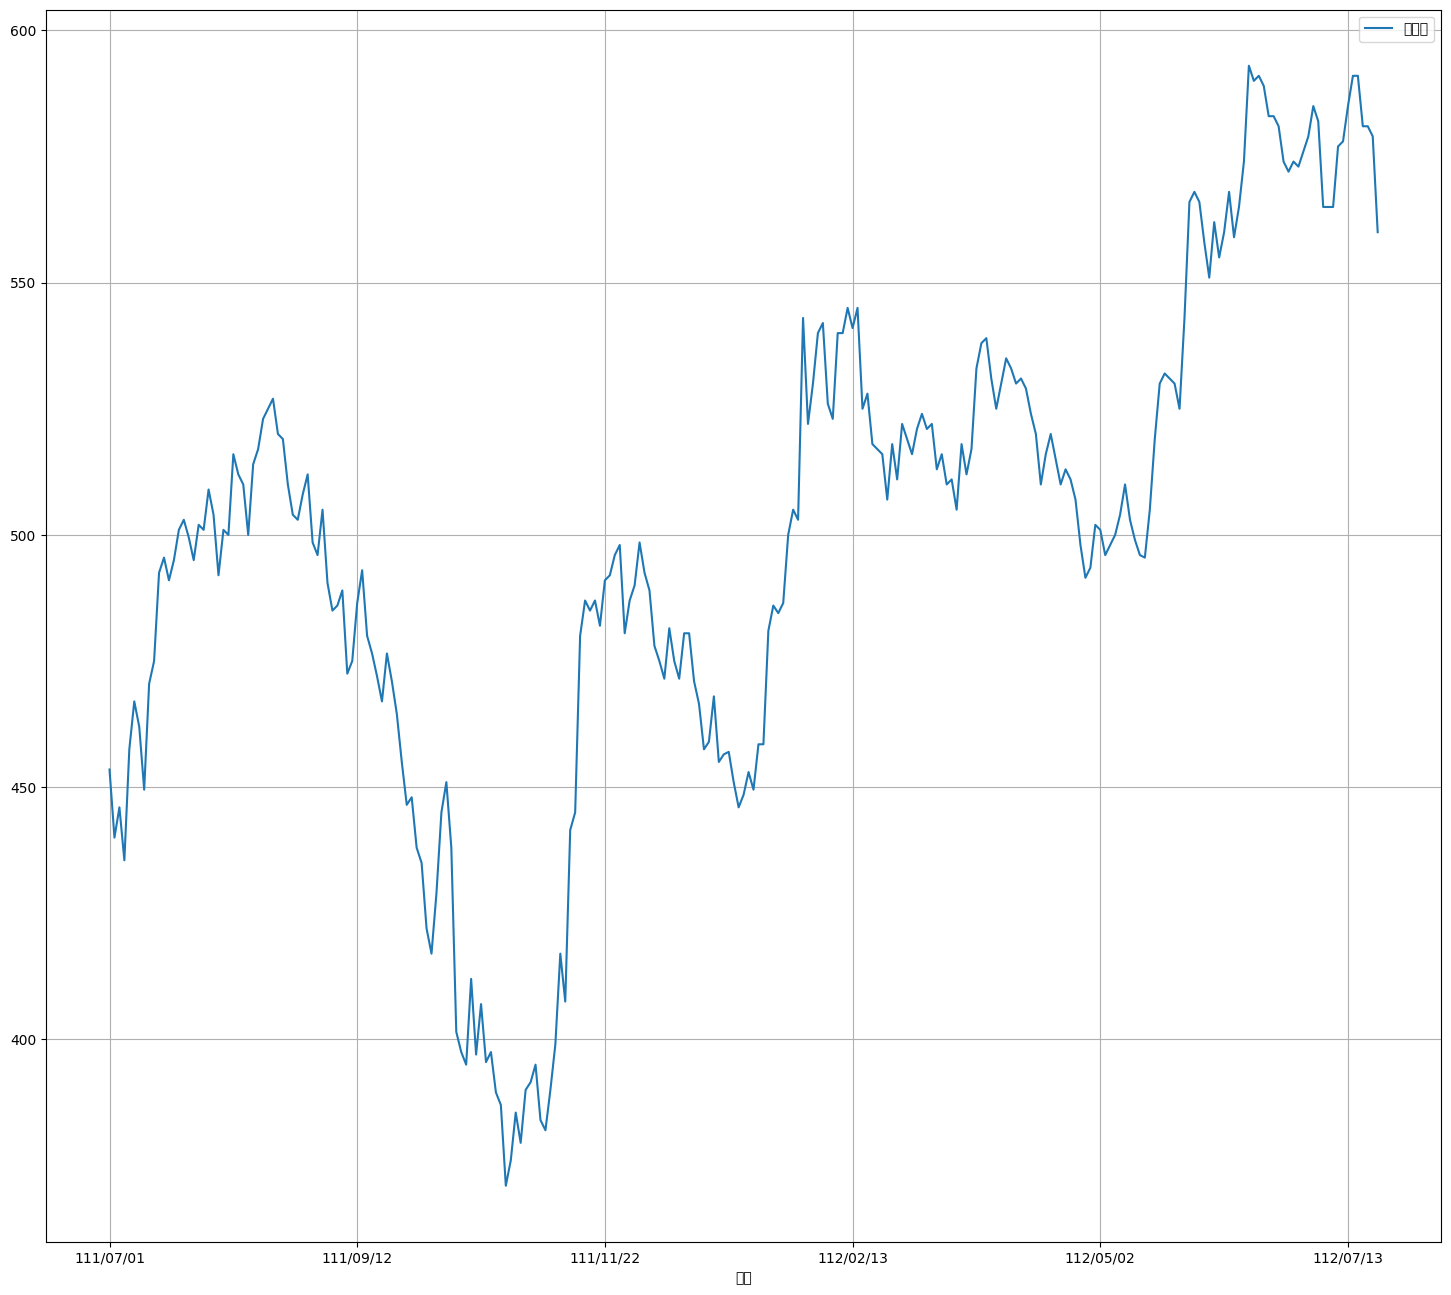

In [ ]:
data_raw = allData[allData.columns[-1]]
data_raw.plot(figsize=(18,16),grid=True,legend=True)

In [ ]:
df_X = allData.iloc[:-1,2:3]
df_y = allData.iloc[1:,-1]
df_X.head()

,開盤價
日期,
111/07/01,471.5
111/07/04,443.0
111/07/05,449.5
111/07/06,442.0
111/07/07,442.0


In [ ]:
df_y.head()

In [ ]:
X = df_X.to_numpy()
y = df_y.to_numpy()

num_data = df_X.shape[0]

# print(num_data)
# print(X)

split_ratio = 0.8
ind_split = int(split_ratio * num_data) #訓練的比數
X_train = X[:ind_split]
y_train = y[:ind_split].reshape(-1,1)
X_test = X[ind_split:]
y_test = y[ind_split:].reshape(-1,1)

print(X_test)
print()
print(y_test)


[[509.]
 [507.]
 [508.]
 [506.]
 [496.]
 [497.]
 [503.]
 [508.]
 [533.]
 [535.]
 [532.]
 [530.]
 [527.]
 [542.]
 [568.]
 [574.]
 [566.]
 [560.]
 [550.]
 [559.]
 [560.]
 [554.]
 [561.]
 [562.]
 [561.]
 [574.]
 [593.]
 [590.]
 [590.]
 [590.]
 [583.]
 [579.]
 [582.]
 [576.]
 [570.]
 [579.]
 [578.]
 [570.]
 [578.]
 [585.]
 [589.]
 [573.]
 [565.]
 [567.]
 [574.]
 [574.]
 [587.]
 [589.]
 [588.]
 [587.]
 [584.]
 [580.]]

[[510. ]
 [503. ]
 [499. ]
 [496. ]
 [495.5]
 [505. ]
 [519. ]
 [530. ]
 [532. ]
 [531. ]
 [530. ]
 [525. ]
 [543. ]
 [566. ]
 [568. ]
 [566. ]
 [558. ]
 [551. ]
 [562. ]
 [555. ]
 [560. ]
 [568. ]
 [559. ]
 [565. ]
 [574. ]
 [593. ]
 [590. ]
 [591. ]
 [589. ]
 [583. ]
 [583. ]
 [581. ]
 [574. ]
 [572. ]
 [574. ]
 [573. ]
 [576. ]
 [579. ]
 [585. ]
 [582. ]
 [565. ]
 [565. ]
 [565. ]
 [577. ]
 [578. ]
 [585. ]
 [591. ]
 [591. ]
 [581. ]
 [581. ]
 [579. ]
 [560. ]]


In [ ]:
linear = LinearRegression()
linear.fit(X_train,y_train) #訓練

#預測
trainline = linear.predict(X_train).reshape(-1,1) #再拿原本的題目問它
predline = linear.predict(X_test).reshape(-1,1) #拿測試題目問它
allPred = np.concatenate((trainline,predline),axis=0) #垂直合併


In [ ]:
pltline = pd.DataFrame(allPred,columns=['linear'+allData.columns[-1]],index=df_y.index)
pltline.head()

,linear收盤價
日期,
111/07/04,471.890932
111/07/05,444.275395
111/07/06,450.573675
111/07/07,443.306429
111/07/08,443.306429


In [ ]:
pltline[allData.columns[-1]] = y
pltline.head()

,linear收盤價,收盤價
日期,,
111/07/04,471.890932,440.0
111/07/05,444.275395,446.0
111/07/06,450.573675,435.5
111/07/07,443.306429,457.5
111/07/08,443.306429,467.0


<Axes: title={'center': '收盤價'}, xlabel='日期'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRA

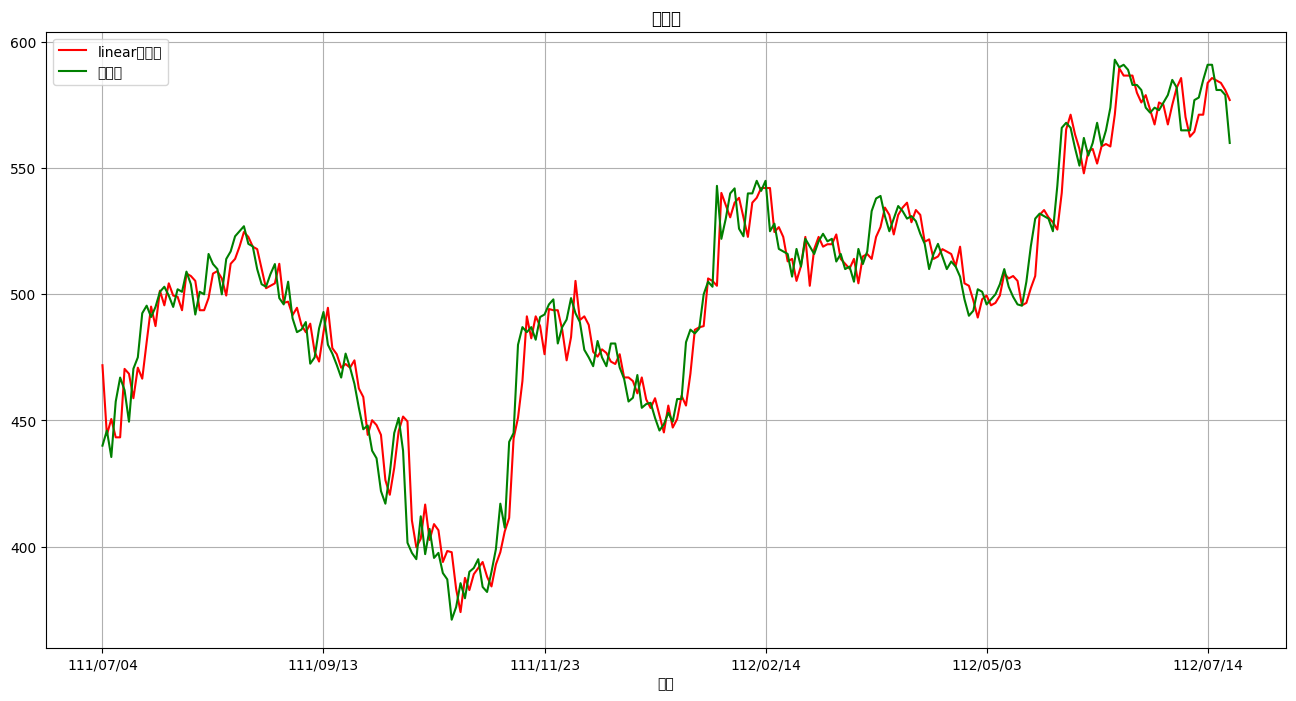

In [ ]:
pltline.plot(figsize=(16,8),title=allData.columns[-1],grid=True,legend=True,color=['r','g'])

#神經網路

tensorflow 函式庫


In [ ]:
#!pip install tendorflow

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
x1 = np.random.random((500,1)) #產生500個亂數，介於0~1之間
x2 = np.random.random((500,1))+1 #產生500個亂數，介於1~2之間
train_X = np.concatenate((x1,x2)) #合併
y1 = np.zeros((500,),dtype=int) #產生500個0
y2 = np.ones((500,),dtype=int) #產生500個1
train_y = np.concatenate((y1,y2))

In [ ]:
#建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=10,activation=tf.nn.relu,input_dim=1),  #10個神經元，激勵函式:relu ,一維數列
    tf.keras.layers.Dense(units=10,activation=tf.nn.relu),  #10個神經元，激勵函式:relu
    tf.keras.layers.Dense(units=2,activation=tf.nn.softmax) #激勵函式為: softmax ,分類使用,units=2 表示有兩個答案
])


Sequential() 建立序列模型物件(神經網路)，內容是空

加入第一層(輸入曾)Dense密集層

Dense是要將每一個神經元和上一層的神經元做連接，又稱:全連接層

會在第一層的輸入時，必須帶入特徵 input_dim (指定輸入的樣本特徵)

例:圖片的尺寸:28*28 => 784px 所以:input_dim=784

例:有學生的資料: 年齡、性別、身高 =>input_dim = 3

activation=relu 激勵函式，主要將小於0的輸出值設定為0

第二層: 隱藏層，不需要輸入特徵(input_dim) ，直接引用上層的特徵

第三層: 輸出層

逤activation 為 softmax(分類)，神經元的個數就是答案的數量

In [ ]:
#摘要
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


第一層 Param ==>1*10+10 =>20
第二層 Param ==>10*10+10 =>110
第三層 Param ==>2*10+2 =>22

In [ ]:
#編譯
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 設定編譯處理 adam 最佳化 loss 損失率的處理方式  mwtrics 以正確率為主(accuracy)

損失函數

二元分類:sigmoid binary_crossentropy (二元交叉熵)

多元分類:softmax categorical_crossentropy(多元交叉熵)

多標籤分類:sigmoid binary_crossentropy

迴歸求0~1的職:sigmoid mse(均方誤差) 或binary_crossentropy

迴歸用於:股價預測、房地產預測

二元分類:資料二種 (貓、狗)、(男、女)

多元分類: (多個資料種類)，依預測機率來決定是哪一類，而將這一類標註

多標籤分類:(用於醫學)，在照X光片時，在X光片中，有二種疾病，它就會所屬的疾病分類下標註


In [ ]:
#訓練
model.fit(train_X,train_y,epochs=20,batch_size=128)
#題目,答案，訓練次數，訓練筆數


Epoch 1/20
8/8 [==============================] - 0s 3ms/step - loss: 0.0839 - accuracy: 0.9950
Epoch 2/20
8/8 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9950
Epoch 3/20
8/8 [==============================] - 0s 3ms/step - loss: 0.0817 - accuracy: 0.9930
Epoch 4/20
8/8 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9930
Epoch 5/20
8/8 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9870
Epoch 6/20
8/8 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9930
Epoch 7/20
8/8 [==============================] - 0s 3ms/step - loss: 0.0777 - accuracy: 0.9950
Epoch 8/20
8/8 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9950
Epoch 9/20
8/8 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.9930
Epoch 10/20
8/8 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9930
Epoch 11/20
8/8 [======================

In [ ]:
test_X = np.array([[0.23],[1.112],[0.99],[1.32]])
test_y = np.array([0,1,0,1])
predict = model.predict(test_X)
print(predict)

1/1 [==============================] - 0s 106ms/step
[[0.99472505 0.00527491]
 [0.15431355 0.84568644]
 [0.5077116  0.49228838]
 [0.0101757  0.98982435]]


In [ ]:
print("答案:",np.argmax(predict[0]),np.argmax(predict[1]),np.argmax(predict[2]),np.argmax(predict[3]))

答案: 0 1 0 1
